# CSC 173 - Intelligent Systems
- Binary Classifier for Bathroom Quality Prediction
- Author: Michael James Carnaje
- Date: October 05, 2024



- Overview: This notebook implements a neural network to predict
  bathroom quality (Good/Bad) based on area and bathrooms.
- Data: house_bathroom.csv

We'll start by loading the libraries and the dataset. 

- Pandas for data manipulation.
- Numpy for numerical operations.
- Matplotlib for visualization.

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset, I converted the table from the assignment file to a csv file.

In [171]:
df = pd.read_csv('house_bathroom.csv')

df

,Area (sq ft),Bathrooms,Classification
0,2104,3,Good
1,1600,3,Good
2,2400,3,Good
3,1416,2,Bad
4,3000,4,Bad
5,1985,4,Good
6,1534,3,Bad
7,1427,3,Good
8,1380,3,Good
9,1494,3,Good


Now we will convert the 'Good' and 'Bad' values in the Classification column to 1 and 0 respectively.

In [172]:
df['Classification'] = df['Classification'].apply(lambda x: 1 if x == 'Good' else 0)

df

,Area (sq ft),Bathrooms,Classification
0,2104,3,1
1,1600,3,1
2,2400,3,1
3,1416,2,0
4,3000,4,0
5,1985,4,1
6,1534,3,0
7,1427,3,1
8,1380,3,1
9,1494,3,1


So to answer the **second question**, we have:
- Input variables: Area (sq ft), Bathrooms
- Output variable: Classification

In [173]:
inputX = df[['Area (sq ft)', 'Bathrooms']].values
inputY = df['Classification'].values

In [174]:
inputX = np.array(inputX)
inputX

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4],
       [1985,    4],
       [1534,    3],
       [1427,    3],
       [1380,    3],
       [1494,    3]])

In [175]:
inputY = np.array(inputY)
inputY


array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

  Let's define the parameters for the binary classifier network.
  - Learning rate: The learning rate is the step size that determines how much the weights and biases are updated during training.
  - Training epochs: The number of epochs is the number of times the entire dataset is passed through the neural network during training.
  - Display step: The display step is the number of epochs after which the loss is displayed.
  - Number of samples: The number of samples is the total number of data points in the dataset.

In [176]:
learning_rate = 0.01
training_epochs = 10000
display_step = 100
n_samples = inputX.size

So to answer the **5th question**, the learning rate is 0.01, the training epochs is 10000.


I used the sigmoid function as the **activation function** because it is a binary classifier. and this will answer the **4th question**.



In [177]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))            

I used the mean squared error as the **loss function** because it is a regression problem. and this will answer the **4th question**.

In [178]:
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

In [179]:
def derivative_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

This BinaryClassifier is the same as the *'Machine Learning for Beginners: An Introduction to Neural Networks'* by **Victor Zhou**. But I made some modifications to the code by adding the *normalize_input* method to normalize the input data, which was not done in the example, and also added the saving of errors in a list for plotting later.


To answer the **3th question**, The initialization of the weights and biases are random, which I got from the example by **Victor Zhou**.


In [180]:
class BinaryClassifier:
    def __init__(self, learning_rate, training_epochs, display_step):
        self.learning_rate = learning_rate
        self.training_epochs = training_epochs
        self.display_step = display_step

        # Normalize the input data
        self.input_mean = None
        self.input_std = None
        
        # Initialize weights
        self.w1 = np.random.uniform(-3, 3)
        self.w2 = np.random.uniform(-3, 3)
        self.w3 = np.random.uniform(-3, 3)
        self.w4 = np.random.uniform(-3, 3)
        self.w5 = np.random.uniform(-3, 3)
        self.w6 = np.random.uniform(-3, 3)
        
        # Initialize biases 
        self.b1 = np.random.uniform(-3, 3)
        self.b2 = np.random.uniform(-3, 3)
        self.b3 = np.random.uniform(-3, 3)

    def normalize_input(self, X):
        if self.input_mean is None or self.input_std is None:
            self.input_mean = np.mean(X, axis=0)
            self.input_std = np.std(X, axis=0)
        
        return (X - self.input_mean) / (self.input_std + 1e-8)


    def feedforward(self, x):
        x_normalized = (x - self.input_mean) / (self.input_std + 1e-8)
        
        h1 = sigmoid(self.w1 * x_normalized[0] + self.w2 * x_normalized[1] + self.b1)
        h2 = sigmoid(self.w3 * x_normalized[0] + self.w4 * x_normalized[1] + self.b2)
        
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        
        return o1
    

    def train(self, data, all_y_trues):
        normalized_data = self.normalize_input(data)
        errors = []
        normalized_data = np.array(normalized_data)
        
        for epoch in range(self.training_epochs):
            epoch_error = 0
            for x, y_true in zip(normalized_data, all_y_trues):
                
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)

                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)

                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                d_L_d_ypred = -2 * (y_true - y_pred)

                d_ypred_d_w5 = h1 * derivative_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * derivative_sigmoid(sum_o1)
                d_ypred_d_b3 = derivative_sigmoid(sum_o1)

                d_ypred_d_h1 = self.w5 * derivative_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * derivative_sigmoid(sum_o1)

                d_h1_d_w1 = x[0] * derivative_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * derivative_sigmoid(sum_h1)
                d_h1_d_b1 = derivative_sigmoid(sum_h1)

                d_h2_d_w3 = x[0] * derivative_sigmoid(sum_h2)
                d_h2_d_w4 = x[1] * derivative_sigmoid(sum_h2)
                d_h2_d_b2 = derivative_sigmoid(sum_h2)

                self.w1 -= self.learning_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= self.learning_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.w3 -= self.learning_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= self.learning_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.w5 -= self.learning_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= self.learning_rate * d_L_d_ypred * d_ypred_d_w6
                self.b1 -= self.learning_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1
                self.b2 -= self.learning_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2
                self.b3 -= self.learning_rate * d_L_d_ypred * d_ypred_d_b3
                
                loss = mse_loss(y_true, y_pred)
                epoch_error += loss
            
            avg_epoch_error = epoch_error / len(data)
            errors.append(avg_epoch_error)
            
            if epoch % self.display_step == 0:
                print(f"Epoch: {epoch}/{self.training_epochs}, Loss: {avg_epoch_error}")
        
        return normalized_data, errors



Epoch: 0/10000, Loss: 0.3140364050981928
Epoch: 100/10000, Loss: 0.2027232515132852
Epoch: 200/10000, Loss: 0.19176298489789415
Epoch: 300/10000, Loss: 0.18799078930419721
Epoch: 400/10000, Loss: 0.18544352337788103
Epoch: 500/10000, Loss: 0.1834235655931491
Epoch: 600/10000, Loss: 0.18174762234111394
Epoch: 700/10000, Loss: 0.18031921596828993
Epoch: 800/10000, Loss: 0.17907680401542736
Epoch: 900/10000, Loss: 0.17797871579688612
Epoch: 1000/10000, Loss: 0.17699563566348073
Epoch: 1100/10000, Loss: 0.17610629224390104
Epoch: 1200/10000, Loss: 0.17529484371498297
Epoch: 1300/10000, Loss: 0.1745492233376491
Epoch: 1400/10000, Loss: 0.17386005497665383
Epoch: 1500/10000, Loss: 0.17321992105657394
Epoch: 1600/10000, Loss: 0.17262285618872963
Epoch: 1700/10000, Loss: 0.1720639896136507
Epoch: 1800/10000, Loss: 0.17153928823186343
Epoch: 1900/10000, Loss: 0.17104536905602172
Epoch: 2000/10000, Loss: 0.17057936043114483
Epoch: 2100/10000, Loss: 0.17013879804119383
Epoch: 2200/10000, Loss: 0.

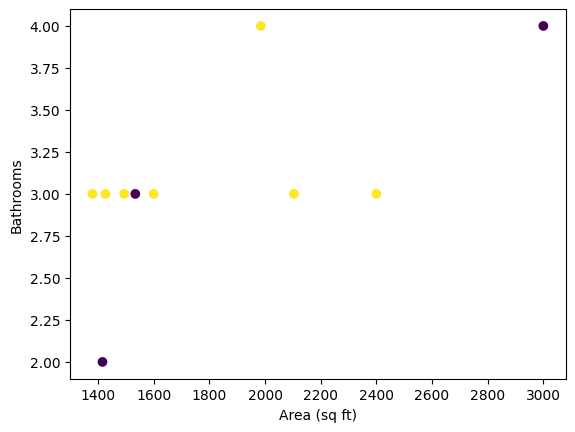

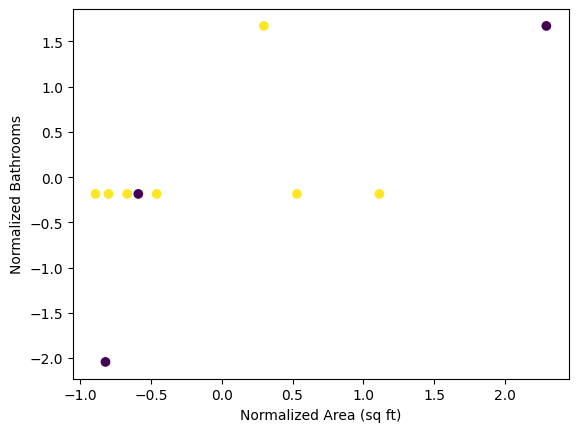

Final cost of the network: 0.214346


In [181]:

network = BinaryClassifier(learning_rate, training_epochs, display_step)
normalized_data, errors = network.train(inputX, inputY)


# plot the original data
df_original = pd.DataFrame(inputX, columns=['Area (sq ft)', 'Bathrooms']) 
df_original['Classification'] = inputY

plt.scatter(df_original['Area (sq ft)'], df_original['Bathrooms'], c=df_original['Classification'])
plt.xlabel('Area (sq ft)')
plt.ylabel('Bathrooms')
plt.show()

# plot the normalized data
df_normalized = pd.DataFrame(normalized_data, columns=['Area (sq ft)', 'Bathrooms'])
df_normalized['Classification'] = inputY

plt.scatter(df_normalized['Area (sq ft)'], df_normalized['Bathrooms'], c=df_normalized['Classification'])
plt.xlabel('Normalized Area (sq ft)')
plt.ylabel('Normalized Bathrooms')
plt.show()

final_predictions = np.array([network.feedforward(x) for x in normalized_data])
final_cost = mse_loss(inputY, final_predictions)

print(f"Final cost of the network: {final_cost:.6f}")

To answer the **7th question**, I save the errors in a list and plot it.

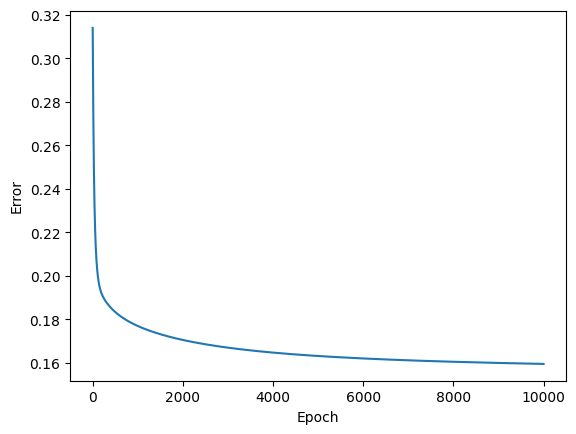

In [182]:
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

To answer the **8th question**, we will test the network with the sample properties which are not in the training data.

In [183]:
sample_properties = np.array([[4000, 1], [1494, 3], [2000, 4]])

for sample in sample_properties:
    prediction = network.feedforward(sample)
    print(f"Area: {sample[0]}, Bathrooms: {sample[1]}, Prediction: {'Good' if prediction > 0.5 else 'Bad'} (Probability: {prediction:.4f})")

Area: 4000, Bathrooms: 1, Prediction: Bad (Probability: 0.1700)
Area: 1494, Bathrooms: 3, Prediction: Good (Probability: 0.7820)
Area: 2000, Bathrooms: 4, Prediction: Good (Probability: 0.7603)


### References:
- Alammar, J. (2019, August 27). A visual and interactive guide to the basics of neural networks. The Blog of Jay Alammar. https://jalammar.github.io/visual-interactive-guide-basics-neural-networks/
- Zhou, V. (2018, September 12). Intro to neural networks: A beginner-friendly introduction. Victor Zhou. https://victorzhou.com/blog/intro-to-neural-networks/